**Descripción general**
El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

y = f(x) =  mx +b

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.


*Importar todas las libreria que utilizaremos en el Proyecto:*

In [633]:
import numpy as np
import sklearn as scikit_learn
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import style

In [122]:
data = np.load('C:\R_File\Master of Data Science\Python\Project\proyecto_data\proyecto_training_data.npy') 

In [553]:
xx = data
training_idx = np.random.randint(xx.shape[0], size=80)
test_idx = np.random.randint(xx.shape[0], size=20)
training, test = xx[training_idx,:], xx[test_idx,:]

In [659]:

casadf = pd.DataFrame(training)
casadf.rename(columns={   0 :'precio',
                          1:'Calif',
                          2:'fsqrt',
                          3 :'trooms',
                          4: 'yearbuilt',
                          5 : 'LotFrontage'}, 
                 inplace=True)
casadf['precio']= casadf['precio']/10000
casadf.fillna(0,inplace=True)

In [660]:
#casadf['Length']= casadf['precio'].astype(str).map(len)
#casadf['trooms'].astype(str).map(len)
#casadf[len] > 0
#casadf.ix[casadf['Length']>=6, ['precio']] = casadf['precio']/10000
casadf

,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
0,19.79,7.0,866.0,6.0,1998.0,80.0
1,26.00,7.0,1153.0,10.0,1980.0,94.0
2,9.00,4.0,1296.0,6.0,1967.0,72.0
3,15.35,5.0,1559.0,5.0,1948.0,90.0
4,20.10,8.0,1466.0,7.0,2007.0,73.0
...,...,...,...,...,...,...
75,8.30,5.0,835.0,5.0,1920.0,85.0
76,20.10,6.0,936.0,7.0,1994.0,70.0
77,11.25,5.0,928.0,5.0,1957.0,50.0
78,22.50,7.0,1005.0,9.0,1999.0,0.0


In [661]:
casadf.describe(include='all')

,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
count,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000
mean,18.562472,6.175000,1226.425000,6.56250,1974.912500,62.925000
std,10.828088,1.597268,484.151608,1.86129,28.938255,33.611622
min,3.490000,2.000000,480.000000,3.00000,1905.000000,0.000000
25%,12.502500,5.000000,889.500000,5.00000,1957.750000,51.500000
50%,16.350000,6.000000,1086.000000,6.00000,1978.500000,65.000000
75%,20.510000,7.000000,1491.000000,8.00000,2003.000000,80.000000
max,75.500000,10.000000,3228.000000,12.00000,2009.000000,152.000000


**histograma de la variable.**

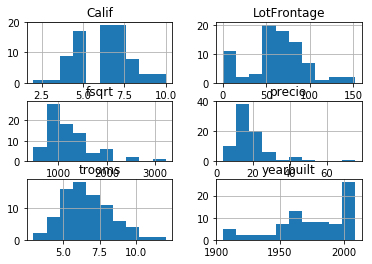

In [662]:
casadf.hist()
plt.show()

**Exploracion de Variables :**
Calcular el coeficiente de correlación entre x y y


In [663]:

casadf.corr(method='pearson', min_periods=1)


,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
precio,1.000000,0.817254,0.710392,0.604084,0.514095,0.310975
Calif,0.817254,1.000000,0.570842,0.558299,0.603915,0.371364
fsqrt,0.710392,0.570842,1.000000,0.538904,0.380046,0.178007
trooms,0.604084,0.558299,0.538904,1.000000,0.301503,0.173072
yearbuilt,0.514095,0.603915,0.380046,0.301503,1.000000,0.131682
LotFrontage,0.310975,0.371364,0.178007,0.173072,0.131682,1.000000


graficar x vs y(scatterplot) usando matplotlib
Colocar el coeficiente de correlación y colocarlo  como parte del título de la gráfica. 


(80, 1)
(80,)


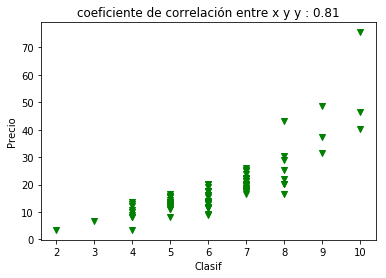

In [664]:


X = casadf.drop(["precio","trooms","yearbuilt","LotFrontage","fsqrt"], axis=1).values
Y = casadf["precio"].values 

print(X.shape)
print(Y.shape)
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.scatter(X, Y,marker="v",color="g")  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'#
#ax.scatter(x, y,color="g")  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'

ax.set_xlabel('Clasif')
ax.set_ylabel('Precio')
ax.set_title('coeficiente de correlación entre x y y : 0.81')

plt.show()

Inicializar los parámetros del modelo en un vector (m,b), esto es equivalente a empezar el proceso con una recta inicial la cual en cada iteración actualizaremos hasta encontrar una que aproxime de buena manera los datos x,y


In [665]:
parametros = np.array([0.1,0.2])
unos = np.ones((len(X),1))
uno = np.squeeze(np.asarray(unos))
X   = np.squeeze(np.asarray(X))
X_b = np.c_[X,unos]
m_current = 0
b_current = 0
error = 0
N = float(len(Y))
learning_rate=0.01
lossHistory = []
histepoch = []
m_hist =[]
b_hist =[]
for epoch in np.arange(9, 51,10):
	yhat = (np.dot(X_b , parametros))
	error = (Y-yhat) 
	cost = round(np.mean(error **2)*0.5,2)
	m_gradient =  - np.mean(X * (Y - yhat[0]))
	b_gradient =  - np.mean(Y - yhat[1])
	parametros[0] = parametros[0] - (learning_rate * m_gradient)
	parametros[1] = parametros[1] - (learning_rate * b_gradient)
	lossHistory.append(cost)
	histepoch.append(epoch)
	m_hist.append(parametros[0])
	b_hist.append(parametros[1])
	print(cost,parametros)
	#print(lossHistory.share)
	#print(histepoch)

#	print(parametros)

213.95 [1.33023788 0.37662472]
91.27 [2.01779885 0.46536655]
50.74 [2.40268179 0.50509169]
36.81 [2.61874605 0.51747777]
31.73 [2.74065169 0.5146155 ]


In [666]:
dataf = pd.DataFrame(lossHistory)

dataf['epoch'] = np.arange(len(dataf))

dataf



,0,epoch
0,213.95,0
1,91.27,1
2,50.74,2
3,36.81,3
4,31.73,4


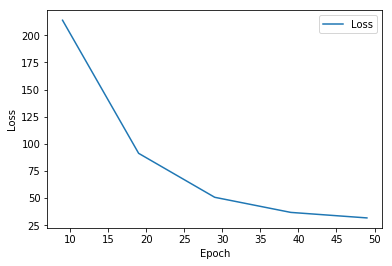

In [667]:


# Create count of the number of epochs
epoch_count =range(1, len(lossHistory) + 1)
plt.plot(histepoch, dataf[0])
plt.legend(['Loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show();



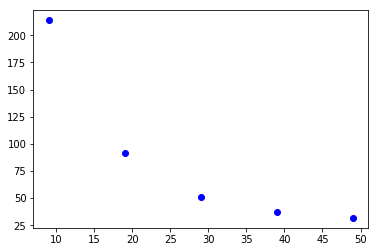

In [668]:
x = histepoch
y = dataf[0]

x_error = 0.08*np.random.randn(len(x)) #medida del error en x
y_error = 0.1*np.random.randn(len(y)) #medida del error en y

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x,y,ecolor="r",fmt="bo",elinewidth=1)

plt.show()


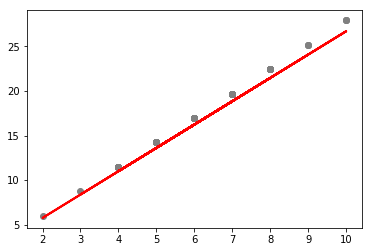

In [669]:

y= parametros[0] *X+ parametros[1]
plt.scatter(X, y,  color='gray')
plt.plot(X, yhat, color='red', linewidth=2)
plt.show()


In [673]:
testdf = pd.DataFrame(test)
testdf.rename(columns={   0 :'precio',
                          1:'Calif',
                          2:'fsqrt',
                          3 :'trooms',
                          4: 'yearbuilt',
                          5 : 'LotFrontage'}, 
                 inplace=True)
testdf['precio']= casadf['precio']
testdf.fillna(0,inplace=True)

testdf

,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
0,19.7900,7.0,764.0,6.0,2003.0,36.0
1,26.0000,7.0,998.0,8.0,1920.0,60.0
2,9.0000,5.0,1535.0,8.0,1979.0,64.0
3,15.3500,8.0,1630.0,8.0,2008.0,61.0
4,20.1000,8.0,1149.0,9.0,2002.0,0.0
5,21.2900,6.0,1204.0,5.0,1998.0,32.0
6,8.0500,6.0,869.0,6.0,1941.0,60.0
7,20.0624,6.0,950.0,5.0,1929.0,50.0
8,25.0000,4.0,546.0,6.0,1970.0,21.0
9,17.4000,6.0,1060.0,8.0,1919.0,60.0


In [687]:
Y = Y.reshape(-1,1)
X = X.reshape(-1,1)
X_test = testdf.drop(["precio","Calif","yearbuilt","LotFrontage","fsqrt"], axis=1).values
y_test = testdf["precio"].values 
reg = LinearRegression(n_jobs=-1)
reg.fit(X, Y)
pred = reg.predict(X_test)
coefficients = reg.coef_


In [689]:
df_test = pd.DataFrame({'Actual_Y_test': y_test.flatten(), 'Predicted_Y_test': pred.flatten()})
df_test


,Actual_Y_test,Predicted_Y_test
0,19.7900,17.592925
1,26.0000,28.673467
2,9.0000,28.673467
3,15.3500,28.673467
4,20.1000,34.213738
5,21.2900,12.052654
6,8.0500,17.592925
7,20.0624,12.052654
8,25.0000,17.592925
9,17.4000,28.673467


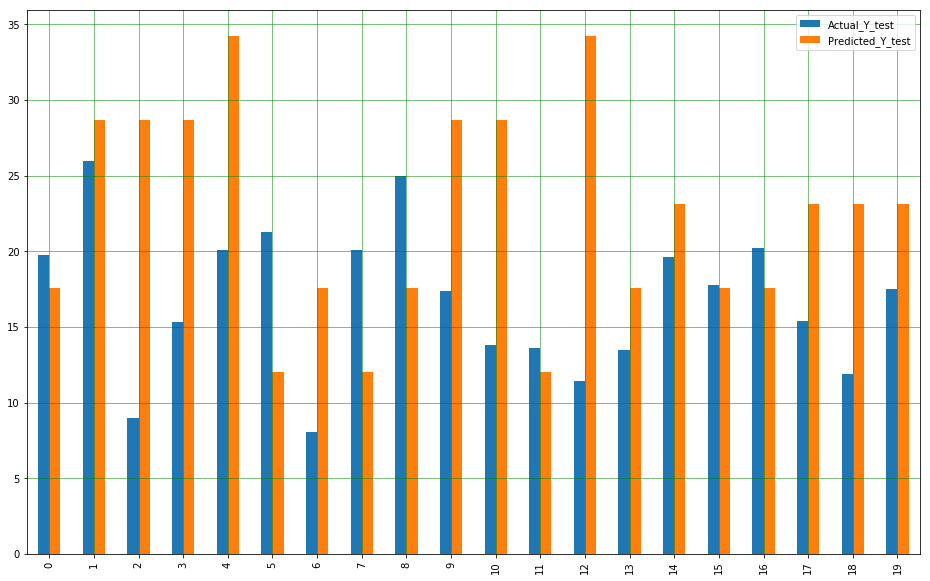

In [691]:
df1 = df_test.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [690]:
df_train = pd.DataFrame({'Actual_Y_train': Y.flatten(), 'Predicted_Y_train': yhat.flatten()})
df_train

,Actual_Y_train,Predicted_Y_train
0,19.79,18.848700
1,26.00,18.848700
2,9.00,10.992462
3,15.35,13.611208
4,20.10,21.467446
...,...,...
75,8.30,13.611208
76,20.10,16.229954
77,11.25,13.611208
78,22.50,18.848700


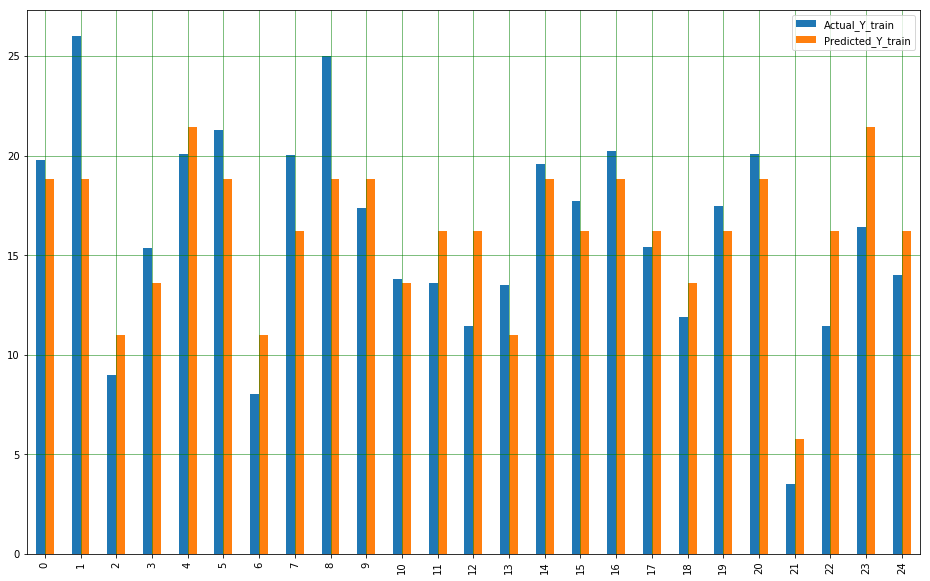

In [692]:
df2 = df_train.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()